In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Decision Tree

In [2]:
df = pd.DataFrame([
    {'bbm': 'pertamax', 'jenis': 'mobil'},
    {'bbm': 'solar', 'jenis': 'truk'},
    {'bbm': 'pertamax', 'jenis': 'mobil'},
    {'bbm': 'solar', 'jenis': 'truk'},
    {'bbm': 'pertamax', 'jenis': 'mobil'},
    {'bbm': 'solar', 'jenis': 'truk'},
])
df

,bbm,jenis
0,pertamax,mobil
1,solar,truk
2,pertamax,mobil
3,solar,truk
4,pertamax,mobil
5,solar,truk


```bash
     BBM?
      |
  ---------
  |       |
pmax    solar
j=car   j=truk
```
- __Root / Root node__: initial questions => BBM apa?
- __Node / Internal node__: question branch
- __Leaves / Leave nodes__: conclusion
- __Decision Tree__: minimum 1 root, 1 node, 2 conclusion
- __Stump__: Decision Tree minimum 1 root & 2 conclusion

<hr>

In [3]:
# ikut ujian & lulus tidaknya
df = pd.DataFrame({
    'ujian': [0, 0, 0, 1, 1, 1],
    'lulus': [0, 0, 0, 0, 1, 1]
})
df

,ujian,lulus
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
5,1,1


```bash
     Ikut ujian?
         |
 yes --------- no
     |       |
  lulus?   lulus?
   2+ 1-   0+ 3-
```

### 1. Gini Impurity

- Gini impurity menghitung kemurnian suatu feature, semakin kecil gini artinya feature tersebut dapat mengklasifikasikan target lebih baik. Feature terbaik dapat dijadikan sebagai __root node__.
- __Gini impurity__ = $1 - P_\textrm{true}^2 - P_\textrm{false}^2$, dengan $P$ adalah probability.
- Di kasus ini: gini ikut Ujian ($gU_1$), gini tak ikut Ujian ($gU_0$), gini Feature Ujian ($gU$)

<hr>

- __Gini Ujian 1 ($gU_1$)__ = $1 - P_\textrm{true}^2 - P_\textrm{false}^2$ = $1 - (2/3)^2 - (1/3)^2$ = __0.4444__

- __Gini Ujian 0 ($gU_0$)__ = $1 - P_\textrm{true}^2 - P_\textrm{false}^2$ = $1 - (0/3)^2 - (3/3)^2$ = __0__

- __Gini Ujian ($gU$)__ = $\displaystyle \sum \frac {n_i} {n_\textrm{total}} \cdot gU_i$ = $\displaystyle \frac {3} {6} \cdot 0.4444 + \frac {3} {6} \cdot 0 =$ __0.2222__ 

<hr>

```bash
     Ikut ujian?
         |
 yes --------- no
     |       |
  lulus?   lulus?
   2+ 1-   0+ 3-
```

### 2. Entropy & Gain

- Entropy = $\displaystyle \sum -P_i \cdot ^2 \log(P_i)$
- Gain = $\textrm{Entropy} - \textrm{Entropy}_i$

<hr>

- __Entropy Ujian 1 Lulus 1__ = $\displaystyle -1 \cdot (2/3) \cdot ^2 \log(2/3)$ = __0.3899__
- __Entropy Ujian 1 Lulus 0__ = $\displaystyle -1 \cdot (1/3) \cdot ^2 \log(1/3)$ = __0.5283__
- __Entropy Ujian 1__ = Entropy Ujian 1 Lulus 1 + Entropy Ujian 1 Lulus 0 = 0.3899 + 0.5283 = __0.9182__

<hr>

- __Entropy Ujian 0 Lulus 1__ = $\displaystyle -1 \cdot (0/3) \cdot ^2 \log(0/3)$ = __0__
- __Entropy Ujian 0 Lulus 0__ = $\displaystyle -1 \cdot (3/3) \cdot ^2 \log(3/3)$ = __-0__
- __Entropy Ujian 0__ = Entropy Ujian 0 Lulus 1 + Entropy Ujian 0 Lulus 0 = 0 + (-0) = __0__

<hr>

- __Entropy Ujian__ = $\displaystyle -1 \cdot (3/6) \cdot ^2 \log(3/6) + -1 \cdot (3/6) \cdot ^2 \log(3/6)$ = __0.5__
- __Gain Ujian 1__ = Entropy Ujian - Entropy Ujian 1 = 0.5 - 0.9182 = __-0.1482__
- __Gain Ujian 0__ = Entropy Ujian - Entropy Ujian 0 = 0.5 - 0 = __0__

In [21]:
np.log(np.e)   # log natural (ln)
np.log10(1000) # log base 10
np.log2(4)     # log base 2
-1 * ((3/6)) * np.log2(3/6)
0.5 - 0.9182

-0.4182

<hr>

### 3. Sklearn Decision Tree

- __A. Gini criterion__

In [30]:
from sklearn.tree import (
    DecisionTreeClassifier, 
    plot_tree,
    export_graphviz
)            

In [23]:
model = DecisionTreeClassifier(criterion='gini')

In [24]:
model.fit(df[['ujian']], df['lulus'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
print(model.predict(df[['ujian']]))
print(model.predict_proba(df[['ujian']]))

[0 0 0 1 1 1]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]


[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

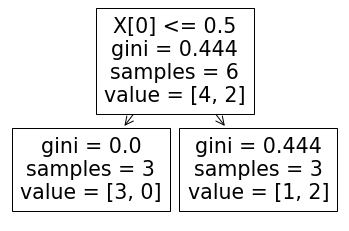

In [28]:
plot_tree(model.fit(df[['ujian']], df['lulus']))

In [33]:
export_graphviz(
    model.fit(df[['ujian']], df['lulus']),
    feature_names = ['Ujian'],
    class_names = ['Tak Lulus', 'Lulus'],
    out_file = 'tree.dot',
    rounded=True, filled=True
)

# return = .dot file => jpg/png/svg 
# https://dreampuf.github.io/GraphvizOnline

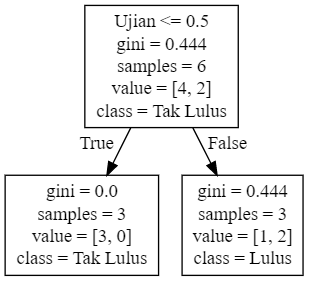

<hr>

- __B. Entropy criterion__

In [34]:
model = DecisionTreeClassifier(criterion='entropy')

In [35]:
model.fit(df[['ujian']], df['lulus'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
print(model.predict(df[['ujian']]))
print(model.predict_proba(df[['ujian']]))

[0 0 0 1 1 1]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]


[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]')]

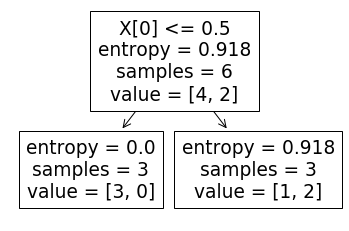

In [37]:
plot_tree(model.fit(df[['ujian']], df['lulus']))

In [38]:
export_graphviz(
    model.fit(df[['ujian']], df['lulus']),
    feature_names = ['Ujian'],
    class_names = ['Tak Lulus', 'Lulus'],
    out_file = 'tree.dot'
)

# return = .dot file => jpg/png/svg 
# https://dreampuf.github.io/GraphvizOnline

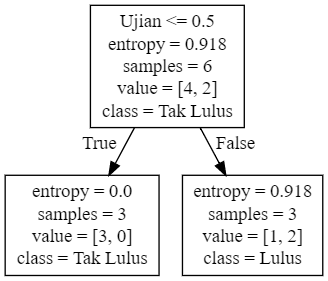